c:\Work\LBD_book\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Work\LBD_book\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


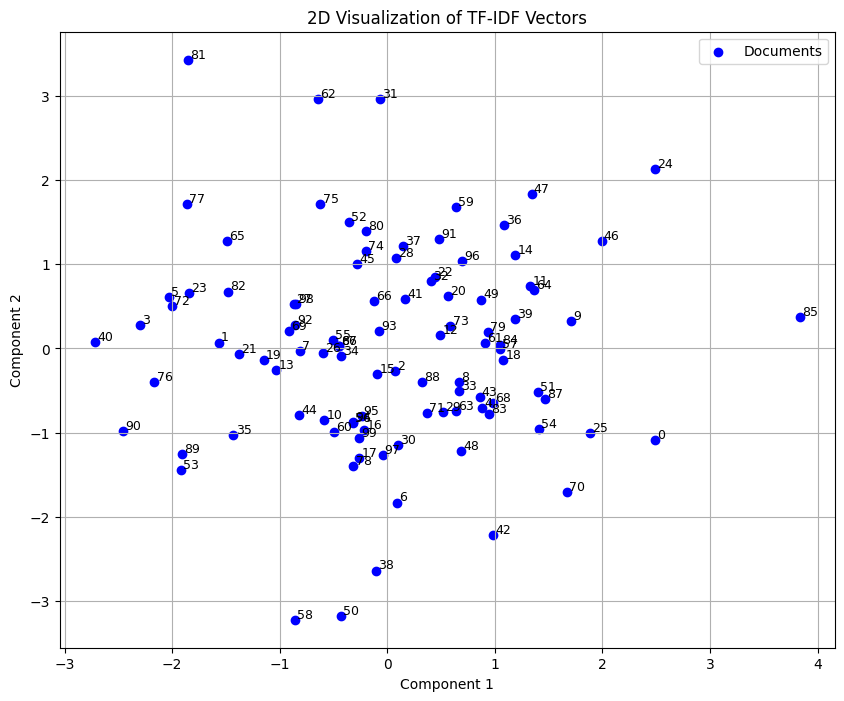

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Generate a random matrix with 100 rows and 1000 columns
np.random.seed(42)  # For reproducibility
tfidf_matrix = np.random.rand(100, 1000)

# Step 2: Apply dimensionality reduction using PCA or t-SNE
# Option 1: Using PCA
pca = PCA(n_components=2)
reduced_matrix_pca = pca.fit_transform(tfidf_matrix)

# Option 2: Using t-SNE (uncomment if you prefer t-SNE over PCA)
tsne = TSNE(n_components=2, random_state=42)
reduced_matrix_tsne = tsne.fit_transform(tfidf_matrix)

# Step 3: Plot the reduced matrix with labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_matrix_pca[:, 0], reduced_matrix_pca[:, 1], c='blue', label='Documents')
# plt.scatter(reduced_matrix_tsne[:, 0], reduced_matrix_tsne[:, 1], c='blue', label='Documents')  # Uncomment if using t-SNE

# Label each point with its document index
for i in range(reduced_matrix_pca.shape[0]):
    plt.text(reduced_matrix_pca[i, 0] + 0.02, reduced_matrix_pca[i, 1] + 0.02, str(i), fontsize=9)
    # plt.text(reduced_matrix_tsne[i, 0] + 0.02, reduced_matrix_tsne[i, 1] + 0.02, str(i), fontsize=9)  # Uncomment if using t-SNE

plt.title('2D Visualization of TF-IDF Vectors')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
from sklearn.metrics import pairwise_distances

# Compute the centroid (mean vector) of the TF-IDF matrix
centroid = np.mean(tfidf_matrix, axis=0)

# Compute the Euclidean distance of each document from the centroid
distances = np.linalg.norm(tfidf_matrix - centroid, axis=1)

# Threshold based on mean and standard deviation
mean_distance = np.mean(distances)
std_distance = np.std(distances)

# Consider documents with distances > mean + 2*std as outliers
outlier_indices = np.where(distances > mean_distance + 2 * std_distance)[0]

print(f"Outlier document indices: {outlier_indices}")


Outlier document indices: [47 62 85 91]


In [6]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN to find outliers
dbscan = DBSCAN(eps=5, min_samples=5, metric='euclidean')
labels = dbscan.fit_predict(tfidf_matrix)

# Outliers are labeled as -1
outlier_indices = np.where(labels == -1)[0]

print(f"Outlier document indices: {outlier_indices}")


Outlier document indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [7]:
from sklearn.ensemble import IsolationForest

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(tfidf_matrix)

# Outliers are labeled as -1
outlier_indices = np.where(outlier_labels == -1)[0]

print(f"Outlier document indices: {outlier_indices}")


Outlier document indices: [36 42 78 83 85]


In [8]:
from sklearn.decomposition import PCA

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(tfidf_matrix)

# Compute distances in the reduced space
centroid_reduced = np.mean(reduced_matrix, axis=0)
distances_reduced = np.linalg.norm(reduced_matrix - centroid_reduced, axis=1)

# Consider outliers in the reduced space
mean_distance_reduced = np.mean(distances_reduced)
std_distance_reduced = np.std(distances_reduced)

outlier_indices = np.where(distances_reduced > mean_distance_reduced + 2 * std_distance_reduced)[0]

print(f"Outlier document indices: {outlier_indices}")


Outlier document indices: [50 81 85]
